**importing packages**

In [3]:
import os

import cv2 as cv
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    GlobalAveragePooling2D,
    MaxPooling2D,
)
from keras.models import Sequential
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

tf.keras.applications.VGG16
import os

import numpy as np
import pandas as pd
from keras.applications.vgg16 import VGG16
from keras.layers import (
    Activation,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    GlobalAveragePooling2D,
    MaxPooling2D,
    ZeroPadding2D,
)
from keras.models import Model

**preprocessing images**

In [4]:
data = []
result = []


def load_images(path):
    l1 = os.listdir(path)
    for i in l1:
        l2 = os.listdir(path + "/" + i)
        for j in l2:
            img = Image.open(path + i + "/" + j)
            img = img.resize(size=(256, 256))
            data.append(np.array(img))
            result.append(i)
    %matplotlib inline
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(5, 4, i + 1)
        plt.imshow(data[i], cmap="gray")
        plt.axis("off")
    plt.show()
    return np.array(data), result

**loading images**

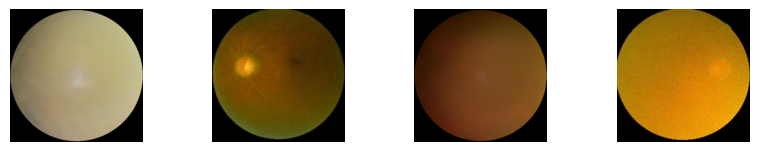

In [6]:
import zipfile

with zipfile.ZipFile("dataset.zip", "r") as zip_ref:
    zip_ref.extractall(".")


data, result = load_images("./dataset/")

In [8]:
data

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

**preprocessing classs label**

In [9]:
t = pd.Series(result, dtype="category").cat.codes

In [10]:
t

0       0
1       0
2       0
3       0
4       0
       ..
4212    3
4213    3
4214    3
4215    3
4216    3
Length: 4217, dtype: int8

**train test split**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    data, t, test_size=0.10, shuffle=True, random_state=10
)

In [12]:
print("x_train Shape : ", x_train.shape)
print("x_test Shape : ", x_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

x_train Shape :  (3795, 256, 256, 3)
x_test Shape :  (422, 256, 256, 3)
y_train Shape:  (3795,)
y_test Shape:  (422,)


In [13]:
import tensorflow.keras as K

In [14]:
input_v = K.Input(shape=(256, 256, 3))

**vgg16**

In [15]:
modelVGG = VGG16(include_top=False, weights="imagenet", input_tensor=input_v)

2024-04-15 21:38:08.353063: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-04-15 21:38:08.353098: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-04-15 21:38:08.353105: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-04-15 21:38:08.353439: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-15 21:38:08.353792: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
for layer in modelVGG.layers:
    layer.trainable = False

**classification**

In [17]:
num_classes = 4
for i, layer in enumerate(modelVGG.layers):
    print(str(i) + " " + layer.__class__.__name__, layer.trainable)

    def lw(bottom_model, num_classes):
        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(4096, activation="relu")(top_model)
        top_model = Dropout(0.625, name="dropout_1")(top_model)
        #         top_model = Dense(1024,activation='relu')(top_model)
        #         top_model = Dropout(0.625, name='dropout_2')(top_model)
        top_model = Dense(4096, activation="relu")(top_model)
        top_model = Dense(4, activation="softmax")(top_model)
        return top_model

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [18]:
num_classes = 4
FC_Head = lw(modelVGG, num_classes)
model = Model(inputs=modelVGG.input, outputs=FC_Head)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [20]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [21]:
history = model.fit(
    x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1
)

Epoch 1/10


2024-04-15 21:38:23.174323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-04-15 21:38:23.192458: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


119/119 [==============================] - 46s 374ms/step - loss: 1.2399 - accuracy: 0.7273 - val_loss: 0.5042 - val_accuracy: 0.7867
Epoch 2/10
119/119 [==============================] - 43s 362ms/step - loss: 0.4693 - accuracy: 0.8211 - val_loss: 0.3819 - val_accuracy: 0.8555
Epoch 3/10
119/119 [==============================] - 43s 365ms/step - loss: 0.4097 - accuracy: 0.8458 - val_loss: 0.3544 - val_accuracy: 0.8531
Epoch 4/10
119/119 [==============================] - 43s 364ms/step - loss: 0.3717 - accuracy: 0.8646 - val_loss: 0.3697 - val_accuracy: 0.8555
Epoch 5/10
119/119 [==============================] - 43s 366ms/step - loss: 0.3552 - accuracy: 0.8635 - val_loss: 0.3139 - val_accuracy: 0.8720
Epoch 6/10
119/119 [==============================] - 44s 369ms/step - loss: 0.3272 - accuracy: 0.8711 - val_loss: 0.3268 - val_accuracy: 0.8673
Epoch 7/10
119/119 [==============================] - 44s 368ms/step - loss: 0.3061 - accuracy: 0.8822 - val_loss: 0.3124 - val_accuracy: 0.8

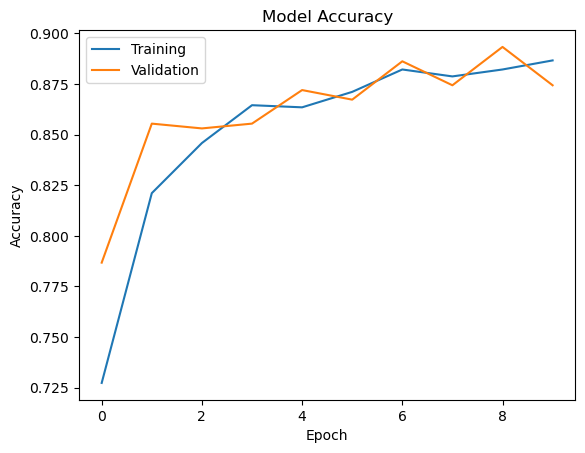

In [22]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc="upper left")
plt.show()

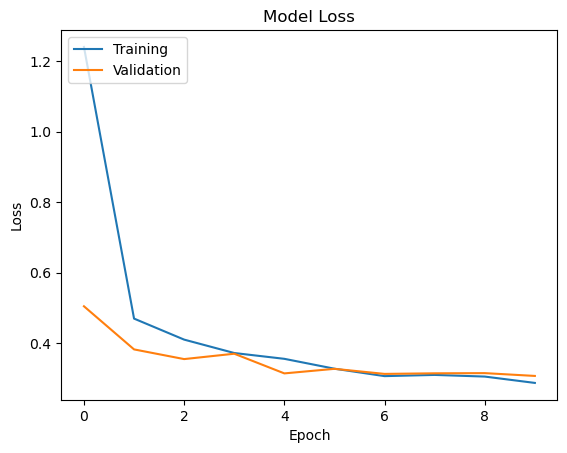

In [23]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc="upper left")
plt.show()

**train accuracy**

In [24]:
loss, aac = model.evaluate(x_train, y_train)

119/119 [==============================] - 38s 318ms/step - loss: 0.2341 - accuracy: 0.9157


**test accuracy**

In [25]:
loss, aac = model.evaluate(x_test, y_test)

14/14 [==============================] - 4s 298ms/step - loss: 0.3067 - accuracy: 0.8744


In [26]:
def names(number):
    if number == 0:
        return "Cataract"
    elif number == 1:
        return "diabetic_retinopathy"
    elif number == 2:
        return "glaucoma"
    elif number == 3:
        return "normal"

In [27]:
from matplotlib.pyplot import imshow


def Prediction(img):
    x = np.array(img.resize((256, 256)))
    x = x.reshape(1, 256, 256, 3)
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(img)
    print(str(res[0][classification] * 100) + "% Confidence " + names(classification))

2024-04-15 21:51:07.733659: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


96.86275124549866% Confidence Cataract


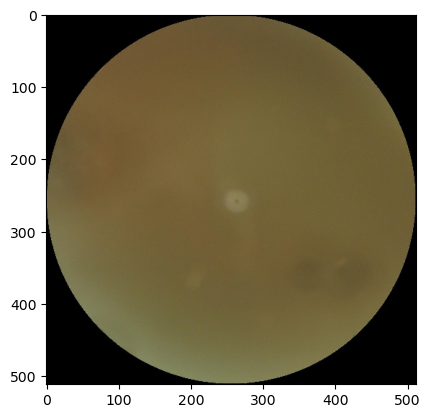

In [28]:
img = Image.open(r"./dataset/cataract/0_left.jpg")
Prediction(img)